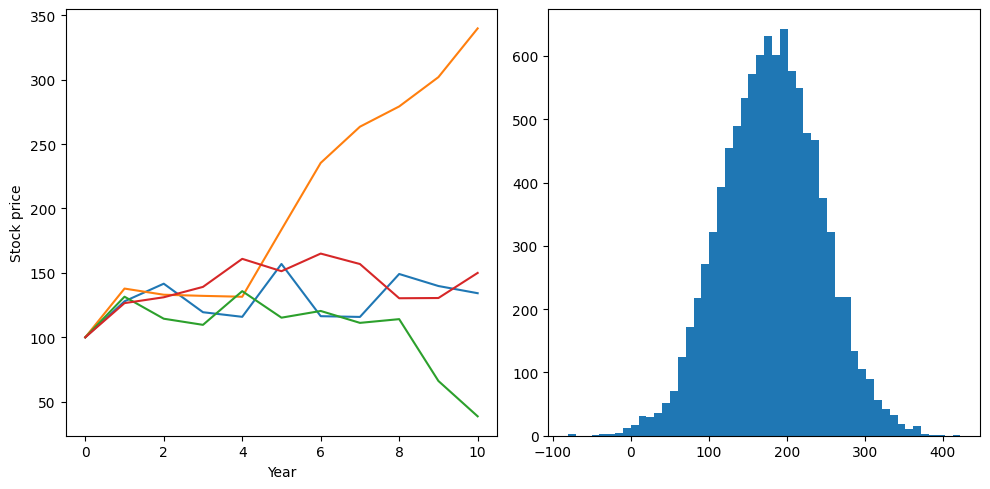

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
np.random.seed(123)

# Normal returns - not a realistic price representation

num_years = 10
num_sims = 10000
mean = 8
stdev = 20
 
z = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1] + z[sim, year]

# Create a figure
plt.figure(figsize=(10, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.plot(P[0:4,:].T)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.hist(P[:,-1], bins=50)

# Show the plots
plt.tight_layout()
plt.show()

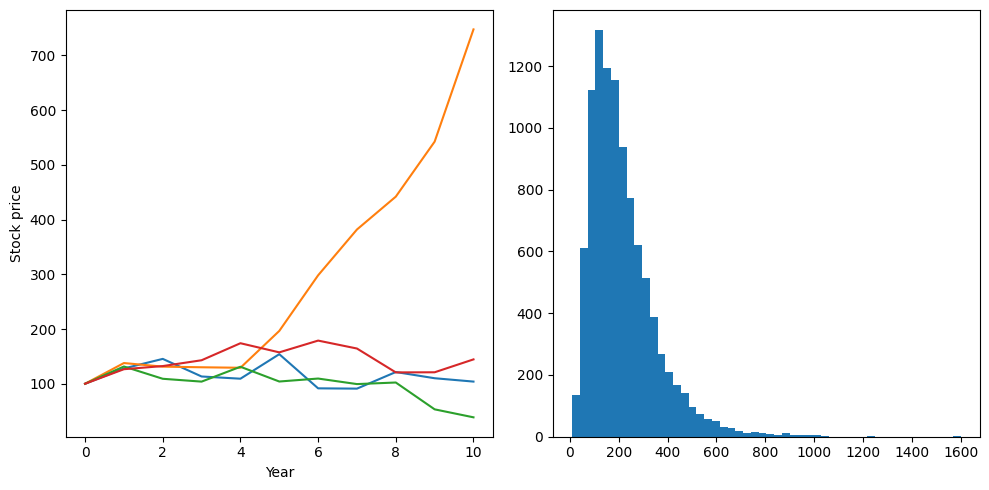

In [14]:
np.random.seed(123)

# Lognormal returns - a more realistic price representation

num_years = 10
num_sims = 10000
mean = 0.08
stdev = 0.20 
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1]* (1 + ret[sim, year])

plt.figure(figsize=(10, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.plot(P[0:4,:].T)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.hist(P[:,-1], bins=50)
# plt.hist(P[:,-1], bins=50, range=(0,800)) # Crop at 800 to remove outliers
# Show the plots
plt.tight_layout()
plt.show()

In [15]:
import yfinance as yf
 
SP500 = yf.download('^GSPC', start='1971-12-31', end='2021-12-31')
SP500 = SP500.resample('YE').last()
SP500['ret'] = SP500['Close'].pct_change()
print('Arithmetic Average: ', SP500['ret'].mean())
print('Standard Deviation: ', SP500['ret'].std())
print('Geometric Average: ', (SP500['Close'].iloc[-1]/SP500['Close'].iloc[0])
       **(1/(len(SP500)-1))-1)
print('Geometric Average Approximation: ', SP500['ret'].mean()
       - 0.5 * (SP500['ret'].std())**2)

[*********************100%%**********************]  1 of 1 completed

Arithmetic Average:  0.09400122842963614
Standard Deviation:  0.16725932009600614
Geometric Average:  0.07995730407222146
Geometric Average Approximation:  0.08001338835014701


The probability of bankruptcy is  0.4809


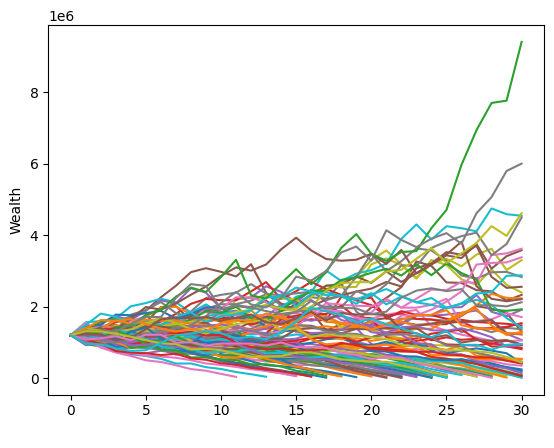

In [16]:
# Simulating probability of running out of money in retirement.

np.random.seed(123)
num_years = 30
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
W0 = 1200000

inflation = 0.02

# Each of 10,000 simulations will have 31 years. Each year has a random return.
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))

W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0

count_bankrupt = 0

for sim in range(num_sims):
    spending = spending_0
    for year in range(1, num_years+1):
        # Check whether you run out of money
        # Take previous wealth, minus spending, then the multiply the results by the return simulated for that year.
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim, year]) # Since ret is multidimensional, we need to index it with [sim, year]
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            # Save result in the wealth matrix
            W[sim, year] = next_period_wealth
        spending = spending * (1 + inflation)

plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:100,:].T);

print("The probability of bankruptcy is ", count_bankrupt/num_sims)

The probability of bankruptcy is  0.2804


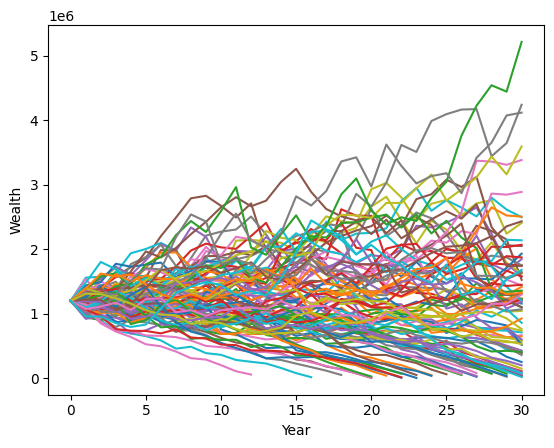

In [17]:
# Simulating portfolio run off with dynamic spending

np.random.seed(123)
num_years = 30
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
spending_min_0 = 48000
W0 = 1200000
 
inflation = 0.02
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
count_bankrupt = 0
 
for sim in range(num_sims):
    spending = spending_0
    spending_min = spending_min_0
    
    for year in range(1, num_years+1):
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim,year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth 
        spending = spending * (1 + inflation)
        spending_min = spending_min * (1 + inflation)
        if (spending < 0.04* W[sim, year]) or (spending > 0.06* W[sim, year]):
            spending = max(0.05 * W[sim, year], spending_min)
 
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:100,:].T);

print("The probability of bankruptcy is ", count_bankrupt/num_sims)

In [18]:
import pandas_datareader.data as web
# Inflation data
start = '01-01-1947'
end = '12-30-2023'
data = web.DataReader(name="CPIAUCNS", data_source='fred', start=start, end=end)
data = data.resample('Y').last() #2
data['yoy'] = data['CPIAUCNS'].pct_change()
data.tail()
data.describe()

/tmp/ipykernel_502989/4196833914.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = data.resample('Y').last() #2


,CPIAUCNS,yoy
count,77.000000,76.000000
mean,120.125104,0.034817
std,85.597849,0.028523
min,23.400000,-0.020747
25%,32.900000,0.016880
50%,109.300000,0.029315
75%,190.300000,0.044232
max,306.746000,0.132939


In [19]:
import statsmodels.api as sm

# Simulating inflation

data['lag'] = data['yoy'].shift()
data = data.dropna()
y = data['yoy']
X = data['lag']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

print("The standard deviation of residuals is ", results.resid.std())

                            OLS Regression Results                            
Dep. Variable:                    yoy   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     59.18
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           5.31e-11
Time:                        16:44:08   Log-Likelihood:                 182.64
No. Observations:                  75   AIC:                            -361.3
Df Residuals:                      73   BIC:                            -356.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.004      2.957      0.0

The probability of bankruptcy is  0.5027


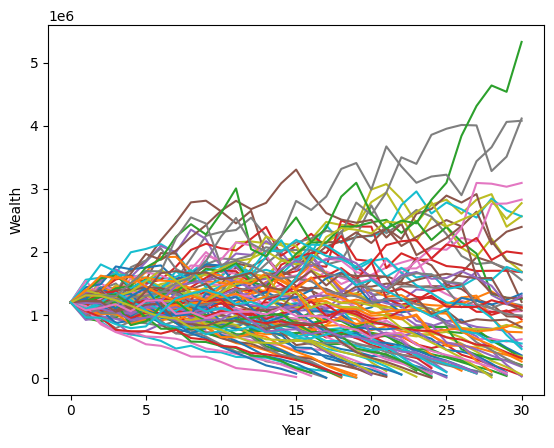

In [20]:
# Simulating portfolio with modelled inflation to represent risk better

np.random.seed(123)
num_years = 30
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
spending_min_0 = 48000
W0 = 1200000
inf0 = 0.035
phi = 0.6695
c = 0.0116
sigma_inf = 0.02132
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
z_inf = np.random.normal(loc=0, scale=1, size=(num_sims, num_years+1))
 
inflation = np.zeros(shape=(num_sims, num_years+1))
inflation[:,0] = inf0
for sim in range(num_sims):
    for year in range(1, num_years+1):
        inflation[sim, year] = (c + phi*inflation[sim, year-1] 
+ sigma_inf*z_inf[sim, year])
 
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
count_bankrupt = 0
 
for sim in range(num_sims):
    spending = spending_0
    spending_min = spending_min_0
 
    for year in range(1, num_years+1):
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim,year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth 
        spending = spending * (1 + inflation[sim, year])
        spending_min = spending_min * (1 + inflation[sim, year])
        if (spending < 0.04* W[sim, year]) or (spending > 0.06* W[sim, year]):
            spending = max(0.05 * W[sim, year], spending_min)

plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:100,:].T);

print("The probability of bankruptcy is ", count_bankrupt/num_sims)

In [21]:
# Sample data bootstrapping - sampling with replacement
# Create a time series of annual stock returns
SP500 = yf.download('^GSPC', start='1971-12-31', end='2021-12-31')
SP500 = SP500.resample('Y').last()
SP500['ret'] = SP500['Close'].pct_change()
SP500 = SP500.dropna()
 
# Generate bootstrapped returns
#ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
ret = np.random.choice(SP500['ret'], size=(num_sims, num_years+1))
ret

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_502989/1938501711.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  SP500 = SP500.resample('Y').last()


array([[ 0.1914846 ,  0.1914846 ,  0.26333408, ...,  0.26333408,
        -0.11501955, -0.11501955],
       [ 0.26333408,  0.03529573,  0.34110655, ...,  0.263804  ,
        -0.38485793,  0.13619432],
       [ 0.12400841, -0.38485793, -0.06559138, ...,  0.2345419 ,
         0.2887807 ,  0.16258923],
       ...,
       [ 0.11390634, -0.29718098,  0.12782714, ...,  0.19419966,
         0.03529573,  0.31549016],
       [ 0.2960125 , -0.17365523, -0.23365964, ...,  0.12782714,
         0.20263666, -0.09730401],
       [ 0.04464263, -0.13042693, -0.13042693, ..., -0.10139185,
         0.07055156, -0.13042693]])

     Healthy Annuitant
Age                   
50            0.002764
51            0.002981
52            0.003202
53            0.003429
54            0.003661
55            0.003908
56            0.004121
57            0.004356
58            0.004616
59            0.004905
60            0.005225
61            0.005582
62            0.005984
63            0.006442
64            0.006969
65            0.007580
66            0.008290
67            0.009114
68            0.010066
69            0.011159
     Healthy Annuitant
Age                   
106           0.430946
107           0.448227
108           0.464592
109           0.479987
110           0.494376
111           0.500000
112           0.500000
113           0.500000
114           0.500000
115           0.500000
116           0.500000
117           0.500000
118           0.500000
119           0.500000
120           1.000000


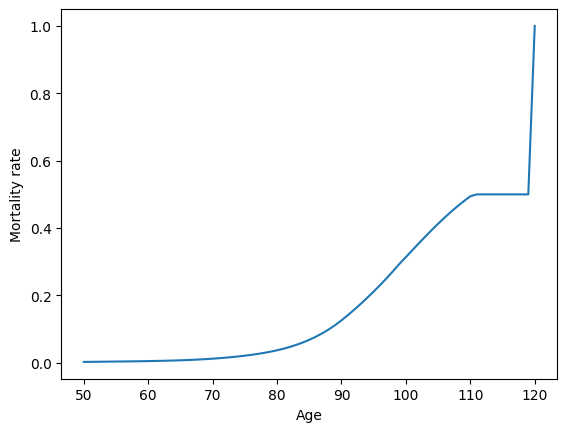

In [40]:
# Longevity risk

# Data from the Society of Actuaries: https://www.soa.org/resources/experience-studies/2014/research-2014-rp/.
file_name = 'research-2014-rp-mort-tab-rates-exposure.xlsx'
sheet = 'White Collar'
gender = 'Males'
if gender == 'Males':
    usecols = 'B,E'
elif gender == 'Females':
    usecols = 'B,I'
mort = pd.read_excel(file_name, sheet, header=3, usecols=usecols).set_index('Age')
mort.dropna(inplace=True)

print(mort.head(n=20))
print(mort.tail(n=15))

plt.xlabel('Age')
plt.ylabel('Mortality rate')
plt.plot(mort)

The prob of running out of money is  0.3686


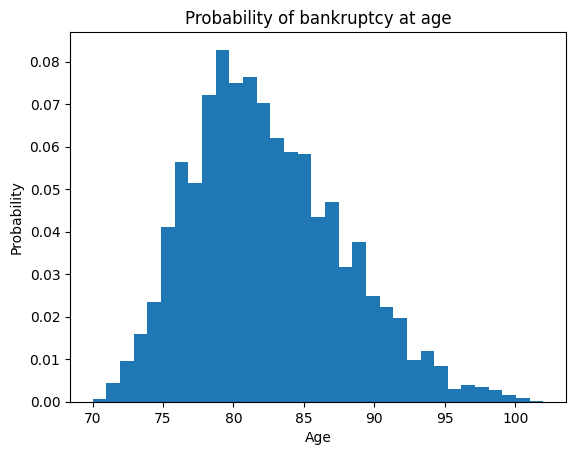

In [37]:
# Simulating wealth but including longevity risk

np.random.seed(123)
num_years = 50
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
W0 = 1200000
age_start = 60
 
inflation = 0.02
 
# Generate normal random returns
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
# Initialize Wealth
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
# Keep track of age if bankrupt
age_bankruptcy = []
 
for sim in range(num_sims):
    spending = spending_0
    year = 0
    alive = True
    bankrupt = False
    while not bankrupt and alive:
        # Check whether you run out of money
        if W[sim, year] - spending < 0:
            age_bankruptcy.append(year+age_start)
            bankrupt = True
        else:
            # Check whether you live to the next year
            mortality_prob = mort['Healthy Annuitant'].loc[year+age_start]
            p = np.random.uniform()
            if p < mortality_prob:
                alive = False
            else:
                year += 1
                W[sim,year] = (W[sim, year-1] - spending) * (1 + ret[sim, year])
            spending = spending * (1 + inflation)
    
bins = max(age_bankruptcy) - min(age_bankruptcy) + 1
plt.title('Probability of bankruptcy at age')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.hist(age_bankruptcy, bins=bins, density=True)

print('The prob of running out of money is ',len(age_bankruptcy)/num_sims)